# <code style="background:#6c89cc; color:black">Project Details</code>

The objective of the project is to let students have a hands-on experience on machine
learning application development, this will help the students to have a better
understanding on the topics and algorithms learned. Specifically in problem formulation,
data collection and processing, data analysis, experiment design, machine learning
methods comparison, performance evaluation, and result analysis. Each group has its
flexibility to choose its own problem and data.

# <code style="background:#6c89cc; color:black">Problem Background</code>

Diseases are something that plague human beings. The top 10 causes of death in the world are all diseases, not accidents. Out of these 10, 7 of them account for diseases that are noncommunicable. These means that they are diseases that are not transmitted from one person to another. These account for 68% of the top 10 causes of death. If we frame this context at a national level, Singapore shares the same sentiment. The top 10 causes of death are also due to diseases. One of the top 5 causes of death worldwide and in Singappore, is stroke.
<br>
<br>
https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
<br>
https://www.moh.gov.sg/others/resources-and-statistics/principal-causes-of-death

# <code style="background:#6c89cc; color:black">Problem Statement</code>

Our project aims to analyse to predict the probability of stroke based of the data of a person's lifestyle habits and medical history.

# <code style="background:#6c89cc; color:black">Data Collection</code>

The dataset used for this problem statement was sourced from Kaggle, a dataset hosting website. It consists of 11 variables, 10 of which are features and 1 of it being the target. The features variables consist of behavioural attributes as well as hereditary attributes that affect a person's probability of getting a stroke.

# <code style="background:#6c89cc; color:black">Load the Libraries</code>

In [81]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
# from flask import Flask, request, render_template
import joblib

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing

import numpy as np
import seaborn as sns

from matplotlib.pylab import seed
from plotly import express as px
from plotly import graph_objects as go

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
# ...and other regression models

# <code style="background:#6c89cc; color:black">Load the Dataset</code>

We will be using the variable "df" to denote the instances of the dataset. "df" will be called in the following cells and be used for different purposes.

In [82]:
# Load the stoke dataset
df = pd.read_csv("../Datasets/stroke_data.csv")

In [83]:
# Display the dimensions of the dataframe (no. of rows, no. of columns)
df.shape

(40910, 11)

In [84]:
#Display a summary of the dataframe (name and no. of columns, number of non-null values in each column, data type of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


# <code style="background:#6c89cc; color:black">Data Exploration</code>

In [85]:
#Assessing for missing values
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [86]:
#Evaluating number of unique values in each column
unique_vals=[]

for col in df.columns:
    unival=df[col].nunique()
    unique_vals.append(unival)

#Presenting the findings using a dataframe
pd.DataFrame(unique_vals,columns=['Unique_Values'],index=df.columns)

Unique_Values
sex                            2
age                          111
hypertension                   2
heart_disease                  2
ever_married                   2
work_type                      5
Residence_type                 2
avg_glucose_level           2903
bmi                          370
smoking_status                 2
stroke                         2

In [87]:
# Display the column names of the dataframe
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### Stroke Distribution
Bar Chart

In [88]:
# Create a histogram using Plotly to visualize the distribution of stroke cases
fig = px.histogram(df, x="stroke", color="stroke", barmode="group", color_discrete_map={0: "green", 1: "red"})

# Update legend labels to be more descriptive
fig.for_each_trace(lambda t: t.update(name={0: 'No Stroke', 1: 'Stroke'}[int(t.name)]))

# Update layout to improve readability
fig.update_layout(legend_title_text="Stroke", legend=dict(title="", traceorder="reversed"),
                  xaxis_title="Stroke", yaxis_title="Count")

# Show the plot
fig.show()

#### Stroke vs Age
Box Plot

In [89]:
# Filter out ages below 1
df_filtered = df[df["age"] >= 1]

fig = px.box(df_filtered, x="stroke", y="age", color="stroke",
             title="Age Distribution by Stroke Status",
             labels={"stroke": "Stroke", "age": "Age"},
             color_discrete_map={0: "blue", 1: "red"})

# Update layout to improve readability and remove legend
fig.update_layout(xaxis_title="Stroke", yaxis_title="Age",
                  xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No Stroke', 'Stroke']),
                  showlegend=False)

fig.show()


#### Stroke vs Sex
Stacked Bar Chart

In [90]:
# Aggregate counts
sex_stroke_counts = df.groupby(["sex", "stroke"]).size().reset_index(name="count")

# Create a stacked bar chart
fig = px.bar(sex_stroke_counts, x="sex", y="count", color="stroke",
             barmode="stack", color_discrete_map={0: "#1CA53B", 1: "#AA1111"},
             title="Stroke Frequency by Sex",
             labels={"sex": "Sex", "count": "Frequency", "stroke": "Stroke"})

# Update x-axis labels to be more descriptive
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Male', 'Female']))

fig.show()

#### Correlation Matrix

In [91]:
# Create annotated heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu',
    colorbar_title="Correlation"
))

# Add text annotations
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        fig.add_annotation(
            x=corr.columns[j],
            y=corr.index[i],
            text=str(round(corr.values[i, j], 2)),
            showarrow=False,
            font=dict(color="black" if abs(corr.values[i, j]) < 0.5 else "white")
        )

fig.update_layout(title="Correlation Matrix", xaxis_title="Features", yaxis_title="Features")
fig.show()

NameError: name 'corr' is not defined

From the correlation matrix above, we can rank the 3 features that affect the models the most in order.
<br>
Features ranked from most to least important:
<br>
1. avg_glucose_lvl
<br>
2. hypertension
<br>
3. heart_disease

#### Stroke vs Average Glucose Level
Box Plot

In [ ]:
fig = px.box(df, x="stroke", y="avg_glucose_level", color="stroke",
             title="Distribution of Average Glucose Level by Stroke Status",
             labels={"stroke": "Stroke", "avg_glucose_level": "Average Glucose Level"},
             color_discrete_map={0: "blue", 1: "red"})

fig.show()

### Lifestyle
#### Stroke vs Ever Married
Pie Chart

In [ ]:
# Filter only stroke cases
stroke_cases = df[df["stroke"] == 1]

fig = px.pie(stroke_cases, names="ever_married", title="Proportion of Stroke Cases by Marital Status",
             color="ever_married", color_discrete_map={"Yes": "red", "No": "blue"})

fig.show()


In [ ]:
# Filter out negative ages
df_filtered = df[df["age"] >= 0]

# Create the box plot
fig = px.box(df_filtered, x="ever_married", y="age", color="stroke",
             title="Age Distribution by Marital Status and Stroke",
             labels={"ever_married": "Ever Married", "age": "Age", "stroke": "Stroke"},
             color_discrete_map={0: "blue", 1: "red"})

fig.show()

#### Stroke vs Work Type
Heat Map<br><br>
Type 0: Never worked<br>Type 1: Children<br>Type 2: Govt job<br>Type 3: Self-employed<br>Type 4: Private

In [ ]:
# Create a crosstab to count occurrences
work_stroke_ct = pd.crosstab(df["work_type"], df["stroke"])

# Convert it into a heatmap
fig = go.Figure(data=go.Heatmap(
    z=work_stroke_ct.values,
    x=["No Stroke", "Stroke"],
    y=work_stroke_ct.index,
    colorscale="reds"))

fig.update_layout(title="Stroke Occurrence by Work Type",
                  xaxis_title="Stroke",
                  yaxis_title="Work Type")

fig.show()

#### Stroke vs Residence Type
Pie Chart<br><br>
0 - Rural<br>1 - Urban

In [ ]:
# Filter only stroke cases
stroke_cases = df[df["stroke"] == 1]

fig = px.pie(stroke_cases, names="Residence_type",
             title="Proportion of Stroke Cases by Residence Type",
             color="Residence_type")

fig.show()

#### Stroke vs BMI
Histogram (& box plot)

In [ ]:
fig = px.histogram(df, x="bmi", color="stroke",
                   title="BMI Distribution for Stroke vs. No Stroke",
                   labels={"bmi": "BMI", "count": "Frequency"},
                   marginal="box", barmode="overlay",
                   color_discrete_map={0: "blue", 1: "red"})

fig.show()

#### Stroke vs Smoking Status

In [ ]:
# Filter only stroke cases
stroke_cases = df[df["stroke"] == 1]

fig = px.pie(stroke_cases, names="smoking_status",
             title="Proportion of Stroke Cases by Smoking Status",
             color="smoking_status")

fig.show()

<h3 style="color:#aed6f1">Relationship Analysis</h3>
Hypertension & Heart Disease vs Stroke

In [ ]:
# Compute stroke percentages for each (hypertension, heart disease) combination
htn_hd_stroke = df.groupby(["hypertension", "heart_disease"])["stroke"].mean().reset_index()

# Convert hypertension and heart disease to categorical labels
htn_hd_stroke["hypertension"] = htn_hd_stroke["hypertension"].replace({0: "No Hypertension", 1: "Has Hypertension"})
htn_hd_stroke["heart_disease"] = htn_hd_stroke["heart_disease"].replace({0: "No Heart Disease", 1: "Has Heart Disease"})

# Create heatmap
fig = px.imshow(htn_hd_stroke.pivot(index="hypertension", columns="heart_disease", values="stroke"),
                labels=dict(x="Heart Disease", y="Hypertension", color="Stroke Probability"),
                color_continuous_scale="Reds",
                title="Stroke Probability by Hypertension and Heart Disease")

fig.show()

From the heatmap above, it is observed that the probability of stroke in:
- "Has heart disease only" (0.77%) is > than "has hypertension only" (0.72%)
- Has both hypertension & heart disease is very high (0.83%)
- No hypertension and heart disease is low (0.39%)

<h3 style="color:#aed6f1">Metabolic Health Analysis</h3>
BMI & Average Glucose Level vs Stroke

In [ ]:
# Scatter plot with BMI on X-axis and Average Glucose Level on Y-axis
fig = px.scatter(df, x="bmi", y="avg_glucose_level", color="stroke",
                 title="BMI vs. Average Glucose Level with Stroke",
                 labels={"bmi": "BMI", "avg_glucose_level": "Average Glucose Level", "stroke": "Stroke"},
                 color_discrete_map={0: "blue", 1: "red"})

fig.show()

- Higher BMI values are associated with a higher likelihood of stroke. This aligns with medical knowledge that obesity is a risk factor for stroke.
- Elevated glucose levels are also associated with a higher risk of stroke. This is consistent with the understanding that diabetes and high blood sugar levels increase stroke risk.
- The combination of high BMI and high glucose levels significantly increases the risk of stroke. Individuals with both risk factors should be closely monitored.

# <code style="background:#6c89cc; color:black">Feature Engineering</code>

It is important to conduct feature engineering as we want to ensure that the data is well prepped to be used for the training models. It consists of handling missing values, encoding categorial variables and feature scaling to name a few.

Here, we drop the columns with null values and check to ensure that they have been dropped.

In [104]:
df = df.dropna()

In [93]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The bar graph showed us that there were ages that had negative values. This is not physically possible and we have to remove these. So

In [105]:
df.query('age >= 1', inplace=True)

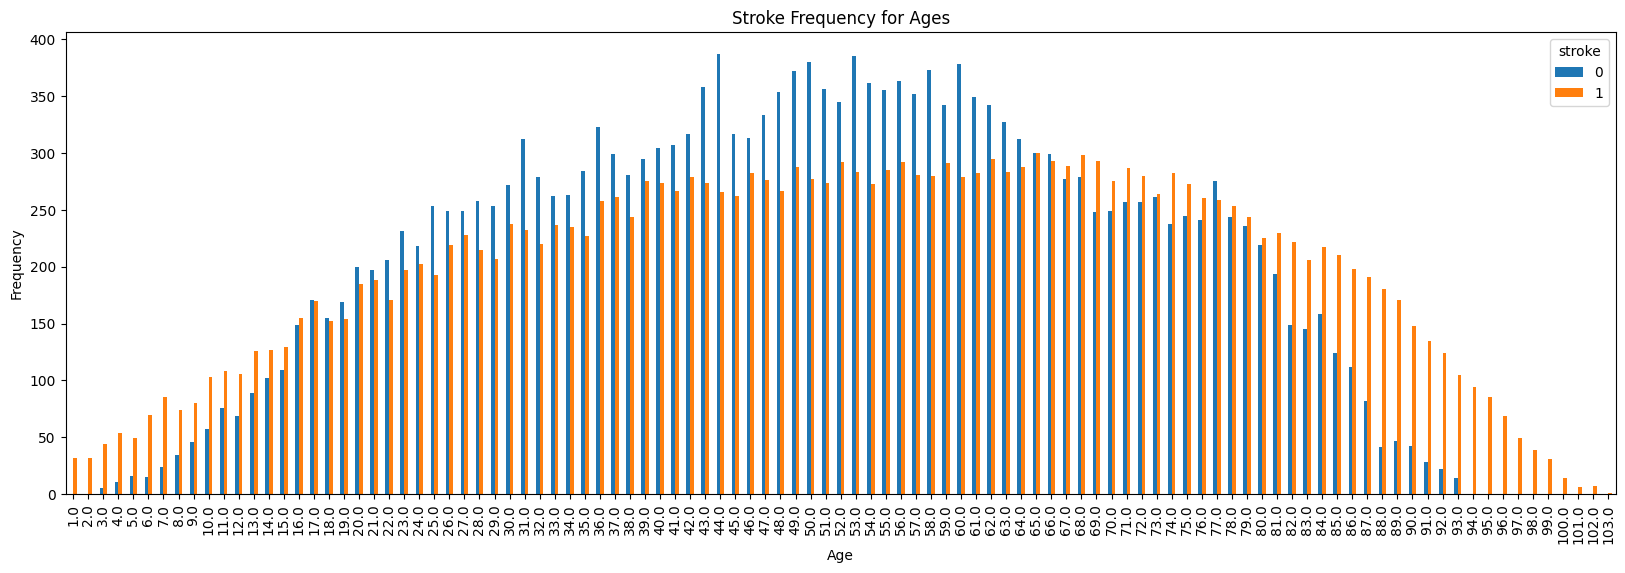

In [106]:
pd.crosstab(df.age,df.stroke).plot(kind="bar",figsize=(20,6))
plt.title('Stroke Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [96]:
df.shape

(40826, 11)

In [97]:
#Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <code style="background:#6c89cc; color:black">Creating Models</code>

The next step is to create the X and Y arrays. These will then further be split into two more arrays, with each having a "train" and "test" set.

In [98]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [100]:
print(X_train.shape)
print(X_test.shape)

(32660, 10)
(8166, 10)


In [101]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

*Save Scaled data to be use on future inputs that are to be predicted

In [102]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the fitted scaler to a file
joblib.dump(scaler, '../Models/scaler.pkl')

['../Models/scaler.pkl']

In [103]:
ten_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GB Classifier': GradientBoostingClassifier(),
    'SGD': SGDClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}

for name, model in ten_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      4062
           1       0.71      0.61      0.65      4104

    accuracy                           0.68      8166
   macro avg       0.68      0.68      0.68      8166
weighted avg       0.68      0.68      0.68      8166

Training Decision Tree...
Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    accuracy                           1.00      8166
   macro avg       1.00      1.00      1.00      8166
weighted avg       1.00      1.00      1.00      8166

Training Random Forest...
Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4062
           1       1.00      1.00      1.00      4104

    a

KeyboardInterrupt: 

In [ ]:
for name, model in ten_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.68
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
SVM Accuracy: 0.77
KNN Accuracy: 0.87
GB Classifier Accuracy: 0.80
SGD Accuracy: 0.68
AdaBoost Accuracy: 0.69
Naive Bayes Accuracy: 0.67
MLP Neural Network Accuracy: 0.88


c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


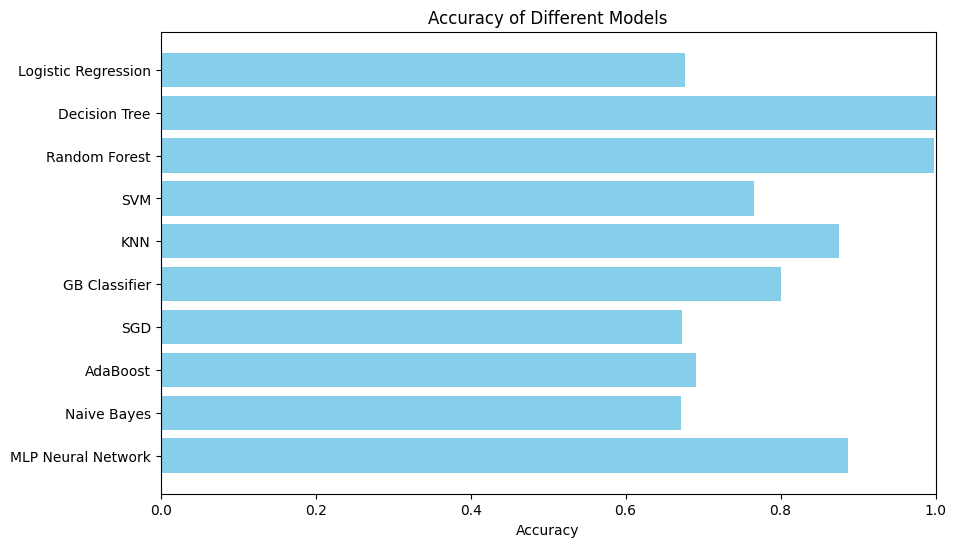

In [ ]:
# Dictionary to store accuracies
accuracies = {}

for name, model in ten_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

The graph above plots the accuracies of the different models tested. From this we can conclude that the Decision Tree and Random Forest algorithms give the highest accuracy. They both have accuracies of 100%. The following three best models are the MLP Classifier, the K-Nearest Neighbour and Gradient Boost Classoifier algorithms with 89% and 87% respectively.
<br>
<br>
Since the Decision Tree and Random Forest output accuracies of 100%, we want to ensure that this isn't due to overfitting. From the correlation matrix above, we can see that the <b>avg_glucose_lvl</b> feature affects the predcition model the most. To test out the efficacy, we will drop this column and train a new model without it.

In [ ]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi','smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [ ]:
no_agl_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'GB Classifier': GradientBoostingClassifier(),
    'SGD': SGDClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP Neural Network': MLPClassifier()
}

for name, model in no_agl_models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.63      0.76      0.68      4062
           1       0.70      0.55      0.62      4104

    accuracy                           0.65      8166
   macro avg       0.66      0.65      0.65      8166
weighted avg       0.66      0.65      0.65      8166

Training Decision Tree...


c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4062
           1       0.96      0.95      0.96      4104

    accuracy                           0.96      8166
   macro avg       0.96      0.96      0.96      8166
weighted avg       0.96      0.96      0.96      8166

Training Random Forest...
Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4062
           1       0.93      0.96      0.95      4104

    accuracy                           0.95      8166
   macro avg       0.95      0.95      0.95      8166
weighted avg       0.95      0.95      0.95      8166

Training SVM...
SVM Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.63      0.78      0.70      4062
           1       0.72      0.55      0.62      4104

    accuracy                           0.66      8166
   macro 

c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for name, model in no_agl_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.65
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.95
SVM Accuracy: 0.66
KNN Accuracy: 0.74
GBR Classifier Accuracy: 0.76
SGD Accuracy: 0.66
AdaBoost Accuracy: 0.67
Naive Bayes Accuracy: 0.65
MLP Neural Network Accuracy: 0.71


c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


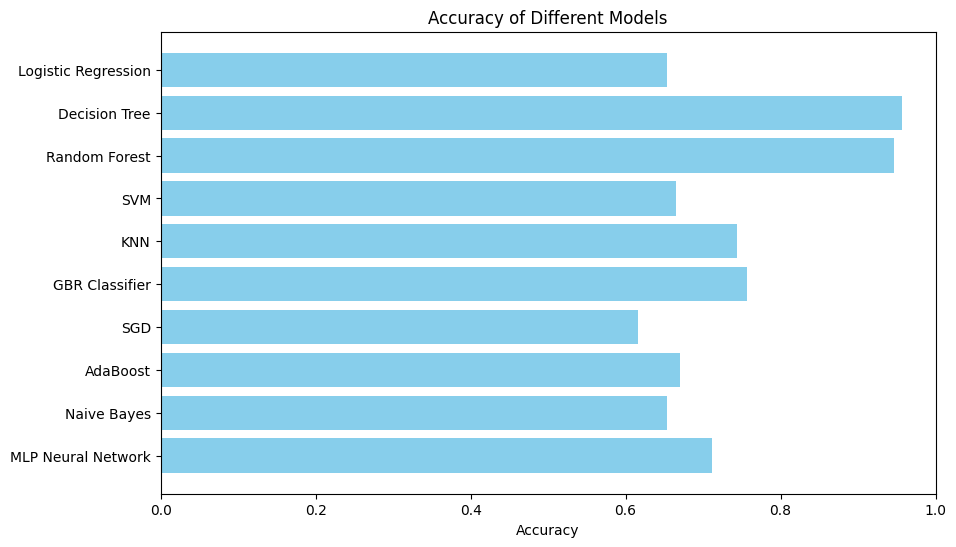

In [ ]:
# Dictionary to store accuracies
accuracies = {}

for name, model in no_agl_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

As seen in the bar graph, the accuracy of the Decision Tree and Random Forest has dropped. From an initial accuracy of 100% to 96% and 95% respectively. From this, we can conclude that <b>avg_glucose_lvl</b> is an important feature which affects the accuracy of these models. This is also further proved by the fact that the accuracies of the other models have dropped as well. All these informations point towards the fact that the models did not initially overfit as hypothesised. As such, we can use them for prediction.

# <code style="background:#6c89cc; color:black">K-Nearest Neighbours</code>

KNN had an intial accuracy of 87%. We will fine-tune the parameters to try and achieve a higher accuracy.

In [107]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [109]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [110]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

Generate an elbow plot so that we can estimate the specific number of neighbours used when training the KNN model

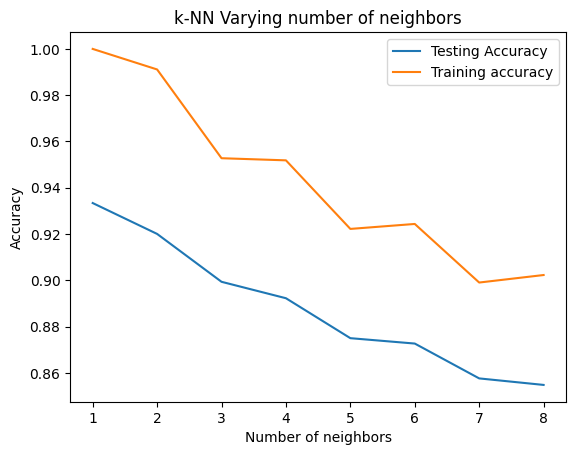

In [112]:
#Generate elbow plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [113]:
param_grid = {
    'n_neighbors': [5, 7, 9, 11],        # Different values for the number of neighbors
    'weights': ['uniform', 'distance'],      # Weight function: 'uniform' means equal weight, 'distance' means closer neighbors have more influence
    'p': [1, 2],                              # p=1 for Manhattan distance, p=2 for Euclidean distance
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

In [114]:
grid_search_knn = GridSearchCV(estimator=knn,
                               param_grid=param_grid,
                               cv=5,                # 5-fold cross-validation
                               scoring='accuracy',  # Optimize based on accuracy
                               n_jobs=-1)           # Use all available cores

In [115]:
# Fit grid search on the training data.
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean',
                                            n_neighbors=np.int64(8)),
             n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [116]:
# Retrieve the best model and parameters.
knn_model = grid_search_knn.best_estimator_
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.91


In [117]:
# Evaluate the Model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4062
           1       0.86      0.99      0.92      4104

    accuracy                           0.92      8166
   macro avg       0.93      0.92      0.92      8166
weighted avg       0.93      0.92      0.92      8166



In [118]:
joblib.dump(knn_model, '../Models/trained_knn.pkl')

['../Models/trained_knn.pkl']

# <code style="background:#6c89cc; color:black">Gradient Boosting Classification</code>

In [119]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [121]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [122]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.0001, 0.001],
    'max_depth': [5, 10],
    'min_samples_leaf': [10, 15],
    'min_samples_split': [20, 40],
    'max_features': ['sqrt', 'log2', 0.5],
    'loss': ['deviance', 'exponential'],
    'subsample': [0.5, 0.7]
}

In [179]:
gbc = ensemble.GradientBoostingClassifier(random_state=5)

In [180]:
# Set up GridSearchCV with 5-fold cross-validation.
grid_search_gbc = GridSearchCV(estimator=gbc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [181]:
grid_search_gbc.fit(X_train, y_train)

c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
186 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Sebert\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [5, 10],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [10, 15],
                         'min_samples_split': [20, 40],
                         'n_estimators': [50, 100], 'subsample': [0.5, 0.7]},
             scoring='accuracy')

In [182]:
# Retrieve the best model and its parameters.
print("Best parameters for Gradient Boosting Classifier:", grid_search_gbc.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_gbc.best_score_))
gbc_model = grid_search_gbc.best_estimator_

Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.001, 'loss': 'exponential', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation score: 0.89


In [183]:
# Evaluate the best model on the test set.
y_pred = gbc_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred)
print(f"Optimized Gradient Boosting Classifier Accuracy: {accuracy_best:.2f}")
print(classification_report(y_test, y_pred))

Optimized Gradient Boosting Classifier Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4062
           1       0.92      0.82      0.87      4104

    accuracy                           0.87      8166
   macro avg       0.88      0.87      0.87      8166
weighted avg       0.88      0.87      0.87      8166



In [184]:
joblib.dump(gbc_model, '../Models/trained_gbc.pkl')

['../Models/trained_gbc.pkl']

# <code style="background:#6c89cc; color:black">MLP</code>

MLP Neural Network

In [130]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [133]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Since we are using pytorch, we have to convert the data to pytorch tensors

In [134]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

A tensor dataset with a dataloader of batch size 8 is created. The shuffle of the dataloader for the training data should be true, and that of the test should be false.

In [135]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [136]:
# Properties of train and test datasets
print("Properties of train/test datasets")
print("Train dataset length:", len(train_dataset))
print("First element of train dataset:", train_dataset[0])
print("Test dataset length:", len(test_dataset))
print("First element of test dataset:", test_dataset[0])

# Properties of train and test loader
print("\n Properties of loaders")
print("Number of batches in train loader:", len(train_loader))
print("Batch size in train loader:", train_loader.batch_size)
print("Number of batches in test loader:", len(test_loader))
print("Batch size in test loader:", test_loader.batch_size)

Properties of train/test datasets
Train dataset length: 27353
First element of train dataset: (tensor([-1.1201, -0.0243, -0.5209, -0.3879,  0.4648, -0.5847, -1.0346, -0.7949,
        -0.8792,  1.0241]), tensor(1))
Test dataset length: 13473
First element of test dataset: (tensor([-1.1201, -0.5346, -0.5209, -0.3879,  0.4648,  0.6896,  0.9665, -0.1942,
        -0.9232,  1.0241]), tensor(1))

 Properties of loaders
Number of batches in train loader: 3420
Batch size in train loader: 8
Number of batches in test loader: 1685
Batch size in test loader: 8


Here, we create and instantiate the MLP class. It only has two functions, the init and forward function. We have set the three layers with certain parameters.

In [137]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = MLP().to(device)

# Print model architecture
print(model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [138]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Properties of optimizer and criterion
print("Properties of optimizer and criterion:")
print("Optimizer:", optimizer)
print("Criterion:", criterion)

Properties of optimizer and criterion:
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Criterion: CrossEntropyLoss()


The training loop is run here with the epoch set to 100. We have taken note of the fact that there will be a matrix dimension mismatch during the forward pass. This is due to the inner dimension not matching. This was rectified by flattening each sample while preserving the batch dimension. This will help to match the input dimension expected by the model.

In [139]:
# Training loop
num_epochs = 100
logs = []

# Enable debug info to check shapes
print(f"First batch shape check:")
for inputs, labels in train_loader:
    print(f"Input shape: {inputs.shape}, Labels shape: {labels.shape}")
    break

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Make sure model is on the right device

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Move tensors to the correct device and ensure correct types
        inputs = inputs.to(device).float()
        labels = labels.to(device).float().view(-1, 1)  # Reshape labels for regression task

        # Forward pass
        outputs = model(inputs)  # Compute model predictions

        # Make sure output and label dimensions match
        if outputs.shape != labels.shape:
            outputs = outputs.view(labels.shape)

        loss = criterion(outputs, labels)  # Compute the loss

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update model parameters

        running_loss += loss.item()

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader)

    if epoch % 20 == 0:
        # Log progress every 20 epochs
        logs.append(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")
        print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")

First batch shape check:
Input shape: torch.Size([8, 10]), Labels shape: torch.Size([8])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x10 and 2x64)

In [ ]:
# Set the model to evaluation mode
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        # Move tensors to device and ensure correct formats
        inputs = inputs.to(device).float()
        labels = labels.to(device)  # For classification, keep as integers

        # Set the forward pass
        outputs = model(inputs)

        # For regression tasks, compare if predictions are close to targets
        # For classification tasks, get the predicted class
        if outputs.shape != labels.shape:
            if outputs.dim() > 1 and outputs.size(1) > 1:
                # Classification task with multiple output classes
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
            else:
                # Regression task
                outputs = outputs.view(-1)
                predicted = outputs.round()  # Round to nearest integer for evaluation
                correct += (predicted == labels).sum().item()
        else:
            # Direct comparison
            predicted = outputs.round()
            correct += (predicted == labels).sum().item()

        # Get the number of observations in the batch
        total += labels.size(0)

mlp_accuracy = correct / total
print(f'Test Accuracy: {mlp_accuracy * 100:.2f}%')

Test Accuracy: 47.55%


MLP Classifier

In [140]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [142]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [143]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
# Define a parameter grid for the MLP model.
param_grid = {
    'hidden_layer_sizes': [(50,), (25, 25)],
    'alpha': [0.01, 0.02],           # L2 regularization parameter
    'learning_rate_init': [0.001, 0.01],
    'learning_rate': ['invscaling', 'adaptive'],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'early_stopping': [True],
}

In [145]:
# Initialize the MLPClassifier with max_iter and early_stopping.
mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=5)

In [146]:
# Set up GridSearchCV with 5-fold cross-validation.
grid_search_mlp = GridSearchCV(estimator=mlp,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

In [147]:
# Training the MLP model
grid_search_mlp.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=5),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.02],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(50,), (25, 25)],
                         'learning_rate': ['invscaling', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [148]:
# Retrieve the best model and parameters.
mlp_model = grid_search_mlp.best_estimator_
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_mlp.best_score_))

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (25, 25), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'solver': 'adam'}
Best cross-validation score: 0.97


In [149]:
y_pred = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Neural Network Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

MLP Neural Network Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4062
           1       0.95      0.99      0.97      4104

    accuracy                           0.97      8166
   macro avg       0.97      0.97      0.97      8166
weighted avg       0.97      0.97      0.97      8166



In [150]:
joblib.dump(mlp_model, '../Models/trained_mlp.pkl')

['../Models/trained_mlp.pkl']

# <code style="background:#6c89cc; color:black">Decision Tree</code>

In [151]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [153]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [154]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [203]:
param_grid = {
    'max_depth': [10, 15],
    'min_samples_split': [10, 20, 30, 50],
    'min_samples_leaf': [10, 15, 20],
    'max_features': ['sqrt', 'log2', 0.5, 0.3],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.008]
}

In [204]:
dt = DecisionTreeClassifier(random_state=5)

In [205]:
# Set up GridSearchCV with 5-fold cross-validation.
grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)

In [206]:
grid_search_dt .fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'ccp_alpha': [0.008], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2', 0.5, 0.3],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 50]},
             scoring='accuracy')

In [207]:
# Retrieve and print the best parameters and cross-validation score.
dt_model = grid_search_dt .best_estimator_
print("Best parameters for Decision Tree:", grid_search_dt .best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_dt .best_score_))

Best parameters for Decision Tree: {'ccp_alpha': 0.008, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best cross-validation score: 0.70


In [208]:
# Evaluate the Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      4062
           1       0.73      0.67      0.70      4104

    accuracy                           0.71      8166
   macro avg       0.71      0.71      0.71      8166
weighted avg       0.71      0.71      0.71      8166



*Optimisation of Decision Tree hyperparemeters such as max_depth may not be helpful since the more splits there are the more the model overfits

In [209]:
joblib.dump(dt_model, '../Models/trained_dt.pkl')

['../Models/trained_dt.pkl']

# <code style="background:#6c89cc; color:black">Random Forest</code>

In [162]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values
y = df['stroke'].values

accuracies = {}

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=5)

In [164]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [165]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
param_grid = {
    'max_depth': [10, 15],         # Control tree depth.\n",
    'min_samples_split': [10, 20, 30, 50],      # Minimum samples needed to consider a split
    'min_samples_leaf': [10, 15, 20],        # Minimum samples at each leaf
    'max_features': ['sqrt', 'log2', 0.5, 0.3],  # Features considered for split
    'criterion': ['gini', 'entropy'],       # The function to measure the quality of a split
    'ccp_alpha': [0.008]
}

In [211]:
rf = RandomForestClassifier(n_estimators=100, random_state=5)

In [212]:
# Set up GridSearchCV with 5-fold cross-validation.
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [213]:
# Fit grid search on the training data.
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'ccp_alpha': [0.008], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2', 0.5, 0.3],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 50]},
             scoring='accuracy')

In [214]:
# Retrieve the best model and parameters.
rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Best parameters for Random Forest: {'ccp_alpha': 0.008, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 10}
Best cross-validation score: 0.70


In [215]:
# Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      4062
           1       0.73      0.62      0.67      4104

    accuracy                           0.70      8166
   macro avg       0.70      0.70      0.70      8166
weighted avg       0.70      0.70      0.69      8166



In [216]:
joblib.dump(rf_model, '../Models/trained_rf.pkl')

['../Models/trained_rf.pkl']

# <code style="background:#6c89cc; color:black">Predictions with Models</code>

Use the trained models to make predictions

The following are a series of predicitions that input different variables. They are intended to represent a human with the assigned respective variables. We will comapare how the different variables affect the stroke prediciton.

Person #1 (Average Glucose Level)

In [173]:
# Load the model we trained previously
prediction_model_1 = joblib.load('../Models/trained_rf.pkl')
scaler = joblib.load('../Models/scaler.pkl')

person_with_high_agl = [
    1,      # sex
    27,     # age
    0,      # hypertension
    0,      # heart_disease
    0,      # evermarried
    3,      # work_type
    1,    # residence_type
    75,      # avg_glucose_level
    21,      # bmi
    0,      # smoking_status
]
1,15.0,0,0,1,3,0,91.54,31.4,0,
person_to_predict = scaler.transform([person_with_high_agl])

predicted_patient_presence = prediction_model_1.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_1.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 0 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.1400 or 14.00%
Class probabilities: No Stroke: 0.8600, Stroke: 0.1400


Person #2 (Above Average Glucose Level)

In [174]:
# Load the model we trained previously
prediction_model_2 = joblib.load('../Models/trained_rf.pkl')
scaler = joblib.load('../Models/scaler.pkl')
person_with_low_agl = [
    1,      # sex
    23,     # age
    0,      # hypertension
    0,      # heart_disease
    0,      # evermarried
    3,      # work_type
    0,    # residence_type
    149,      # avg_glucose_level
    22,      # bmi
    0,      # smoking_status
]

person_to_predict = scaler.transform([person_with_low_agl])

predicted_patient_presence = prediction_model_2.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_2.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 0 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.0183 or 1.83%
Class probabilities: No Stroke: 0.9817, Stroke: 0.0183


The findings show that average glucose level does not sway the prediction results. In both cases, the model predicted that the likelihood of not having stroke was 74% and 75% respectively.

Person #3 (Hypertension present)

In [175]:
# Load the model we trained previously
prediction_model_1 = joblib.load('../Models/trained_rf.pkl')
scaler = joblib.load('../Models/scaler.pkl')

person_with_high_agl = [
    0,      # sex
    47,     # age
    1,      # hypertension
    1,      # heart_disease
    0,      # evermarried
    3,      # work_type
    1,    # residence_type
    75,      # avg_glucose_level
    21,      # bmi
    1,      # smoking_status
]

person_to_predict = scaler.transform([person_with_high_agl])

predicted_patient_presence = prediction_model_1.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_1.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 1 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.7234 or 72.34%
Class probabilities: No Stroke: 0.2766, Stroke: 0.7234


In [176]:
# Load the model we trained previously
prediction_model_2 = joblib.load('../Models/trained_rf.pkl')
scaler = joblib.load('../Models/scaler.pkl')
person_with_low_agl = [
    0,      # sex
    19,     # age
    0,      # hypertension
    0,      # heart_disease
    0,      # evermarried
    1,      # work_type
    1,    # residence_type
    85,      # avg_glucose_level
    19,      # bmi
    0,      # smoking_status
]

person_to_predict = scaler.transform([person_with_low_agl])

predicted_patient_presence = prediction_model_2.predict(person_to_predict)
predicted_presence = predicted_patient_presence[0]

# Get probability estimates for each class
predicted_probabilities = prediction_model_2.predict_proba(person_to_predict)
probability_of_stroke = predicted_probabilities[0][1]  # Probability of class 1 (has stroke)

print(f"Predicted class: {predicted_presence} (0=No Stroke, 1=Stroke)")
print(f"Probability of stroke: {probability_of_stroke:.4f} or {probability_of_stroke*100:.2f}%")

# If you want to see probabilities for both classes
print(f"Class probabilities: No Stroke: {predicted_probabilities[0][0]:.4f}, Stroke: {predicted_probabilities[0][1]:.4f}")

Predicted class: 0 (0=No Stroke, 1=Stroke)
Probability of stroke: 0.0278 or 2.78%
Class probabilities: No Stroke: 0.9722, Stroke: 0.0278


The findings clearly show that hypertension plays a massive part in increasing the chances of stroke in a person.

In [217]:
# These are the feature labels from our data set
feature_labels = np.array(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])

# Load the trained model created with train_model.py
fi_model_knn = joblib.load('../Models/trained_knn.pkl')
fi_model_mlp = joblib.load('../Models/trained_mlp.pkl')
fi_model_gbc = joblib.load('../Models/trained_gbc.pkl')
fi_model_dt = joblib.load('../Models/trained_dt.pkl')
fi_model_rf = joblib.load('../Models/trained_rf.pkl')

# Create a numpy array based on the model's permutation importances
result_knn = permutation_importance(fi_model_knn, X_test, y_test, n_repeats=10, random_state=5)
result_mlp = permutation_importance(fi_model_mlp, X_test, y_test, n_repeats=10, random_state=5)
# Create a numpy array based on the model's feature importances
importance_gbc = fi_model_gbc.feature_importances_
importance_dt = fi_model_dt.feature_importances_
importance_rf = fi_model_rf.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance_knn = result_knn.importances_mean.argsort()
feature_indexes_by_importance_mlp = result_mlp.importances_mean.argsort()
feature_indexes_by_importance_gbc = importance_gbc.argsort()
feature_indexes_by_importance_dt = importance_dt.argsort()
feature_indexes_by_importance_rf = importance_rf.argsort()

# Print each feature label, from most important to least important (reverse order)
print("\nPermutation Importance for KNN:")
for index in feature_indexes_by_importance_knn:
    print(f"{feature_labels[index]} - {feature_indexes_by_importance_knn[index] * 100:.2f}%")

print("\nPermutation Importance for MLP:")
for index in feature_indexes_by_importance_mlp:
    print(f"{feature_labels[index]} - {feature_indexes_by_importance_mlp[index] * 100:.2f}%")

print("\nFeature Importance for gbc:")
for index in feature_indexes_by_importance_gbc:
    print("{} - {:.2f}%".format(feature_labels[index], (importance_gbc[index] * 100.0)))

print("\nFeature Importance for dt:")
for index in feature_indexes_by_importance_dt:
    print("{} - {:.2f}%".format(feature_labels[index], (importance_dt[index] * 100.0)))

print("\nFeature Importance for rf:")
for index in feature_indexes_by_importance_rf:
    print("{} - {:.2f}%".format(feature_labels[index], (importance_rf[index] * 100.0)))


Permutation Importance for KNN:
age - 0.00%
sex - 100.00%
ever_married - 200.00%
heart_disease - 300.00%
hypertension - 400.00%
Residence_type - 900.00%
smoking_status - 700.00%
work_type - 600.00%
bmi - 800.00%
avg_glucose_level - 500.00%

Permutation Importance for MLP:
age - 0.00%
sex - 100.00%
ever_married - 200.00%
heart_disease - 300.00%
hypertension - 400.00%
Residence_type - 900.00%
smoking_status - 700.00%
work_type - 600.00%
bmi - 800.00%
avg_glucose_level - 500.00%

Feature Importance for gbc:
sex - 0.91%
age - 2.40%
Residence_type - 3.11%
smoking_status - 3.29%
heart_disease - 6.07%
ever_married - 6.12%
work_type - 6.14%
hypertension - 9.77%
bmi - 23.33%
avg_glucose_level - 38.85%

Feature Importance for dt:
sex - 0.00%
smoking_status - 0.00%
age - 3.16%
Residence_type - 4.05%
work_type - 4.88%
heart_disease - 5.96%
ever_married - 10.34%
hypertension - 11.55%
bmi - 13.74%
avg_glucose_level - 46.31%

Feature Importance for rf:
smoking_status - 0.09%
sex - 0.86%
Residence_ty

<b>Why is there a difference in feature/permutation importantce vs explored correlation in data?</b>

One explanations is that features such as avg_glucose_level, hypertension, and heart_disease might be highly correlated with stroke when looked at individually. However, if those features are correlated with each other or with other features, the model distributes the weightage among them differently. Hence in most of the models, BMI appears to be more important because it provides unique or robust information that the model finds more useful when making predictions, even if its univariate correlation with stroke is lower.

*Permutation importance indicates the average decrease in a model's performance when a feature's values are randomly shuffled

# <code style="background:#6c89cc; color:black">Modelling Ideology and Analysis</code>

<h3>1) To start off, we are trying to classify future data inputs to find out if a person is at risk of having stroke or not. This means that the target label are 1s and 0s. With this knowledge, we know that we should be using classification models instead of regression because regression models are used for predicting a continuous range or numbers nstead of classes. Therefore, we started off with 10 classification models to have a rough guage on which models performs better on the dataset given.</h3>

<h3>2) To ensure the robustness of our model, we took 5 models that showed an initial accuracy above 80%. Those models were:</h3>

    - Decision Trees (100%)

    - Random Forest (100%)

    - Multilayer Perceptrol aka MLP (88%)

    - K-Nearest Neighbours (87%)
    
    - Gradient Boost Regressor aka GBR (80%)

<b>*With further data exploration, we found that the 100% accuracy is due to features such as avg_glucose_level, hypertension and heart_disease being highly correlated to the risk of getting a stroke.</b>

<h3>3) We then trained these models individually and optimised the hyperparameters of each models through a method called Grid Search, which exhaustively tries every combination of the provided hyper-parameter values to find the best model.</h3>

    <i>* Due to hardware limitations, we could only hypothesize hyperparameters such as max_depth, min_samples_leaf and min_samples_split.</i>

    The hypothesis made were used to prevent the model from overfittinng on the training dataset and hence we see a minor reduction of accuracy of the Decision Trees and Random Forest models from 100%, to 95% and 98% respectively. The following are some of the hyperparameters in which are used to prevent overfitting.

    - max_depth: controls the depth of a tree, for a dataset of 40k entries we decided to find the optimal depth, with the maximum of 15 to avoid an extensive tree that leads to overfitting.

    - min_samples_leaf: controls the minimum samples of each leaf. To avoid overfitting, we chose to train the data with a minimum of 10 samples per leaf.

    - min_samples_split: controls the minimum samples needed before considering to split into smaller child nodes. We againn chose a range with a minimum of 10 to prevent overtiftting.

<h3>4) After the first round of training, all the models had accuracies that ranged from 93% to 100%. With suspicions of our models overfitting, we tested them using new inputs.

The results were incoherent, results would have a high variance with a single digit change in input. For e.g. changing bmi by a factor of 1 would cause over a 20% jump in the prediction probability.

Additionally, we used the trained dataset to output the features/permutations that the models found most important. The models ranked avg_glucose_level, bmi and work_type as the top 3 features. This did not make sense as during the data exploration, we found the top 3 most correlated indicators with the risk of stroke being avg_glucose_level, hypertension and heart_disease.

Therefore, we went back to re-train our models, with the prevention of reduceing overfitting in mind. We reduce the max_depth, min_samples_leaf as well as min_samples_split. Additionally, we added a

Cost Complexity Pruning (CCP) parameter for models that uses Trees, and
Early Stopping = True parameters for other models.

CCP trades model complexity for model performance, while early stopping is used to stop the training process once the model's performance starts to degrade, preventing it from overfitting data to the model.</h3>


<h3>5) After re-optimising the hyperparameters and using it to re-train the models, these were the resultant accuracies of the models:</h3>

    - Multilayer Perceptrol aka MLP (97%)

    - K-Nearest Neighbours (92%)

    - Gradient Boost Regressor aka GBR (87%)

    - Decision Trees (71%)

    - Random Forest (70%)

  

<h3>6) Additionally, to ensure that we covered all bases, we trained unsupervised models as well as neural networks to explore the dataset further. However, the result of the unsupervised learning models (k-means and DBSCAN) were not very helpful in helping us uncover patterns. The Neural Network model on the otherhand had underwhelming accuracies.</h3>


# <code style="background:#6c89cc; color:black">Model Chosen</code>

Through our project, we have found that the <b>Random Forest Model</b> to give us the best results. Here are the following reasons:

1) Although Random Forest (RF) gave us an accuracy of 70%, which is the model with the lowerst accuracy,

2) We found the predictions of Random Forest and Decision Trees to be <b>most logically sound on test data</b>, where a change from 0 to 1 (True to False) for hypertension increases the predicted probability of stroke instead of decreasing it.

3) It does not give us values of 0% and 100% on new input data unlike models such as K-Nearest Neighbours. A predicted probability of 100% or 0% seems suspicious and is unrealistic standards.

4) After deploying appropriate overfitting measures to the models all models, the rest remained quite complex and could not accurately make predictions on new dataset, while Random Forest and Decision Trees dropped their accuracies significantly for a more accurate fit.

5) Based on the feature importance ranking created after the modelling process, the Random Forest is the only model that could rank the 3 most important features as avg_glucose_level, hypertension and heart_disease, which is coherent to our data exploration, where we found those 3 features to hvae the highest correlation to the risk of having stroke.